In [33]:
import pandas as pd

# Loading the dataset from CSV file
df = pd.read_csv('Mall_Customers.csv')

# Showing the first 5 rows to get a quick look at the data
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [36]:
df.duplicated().sum()


np.int64(0)

In [37]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [38]:
X = df.drop('CustomerID', axis=1)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
import pandas as pd

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [41]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


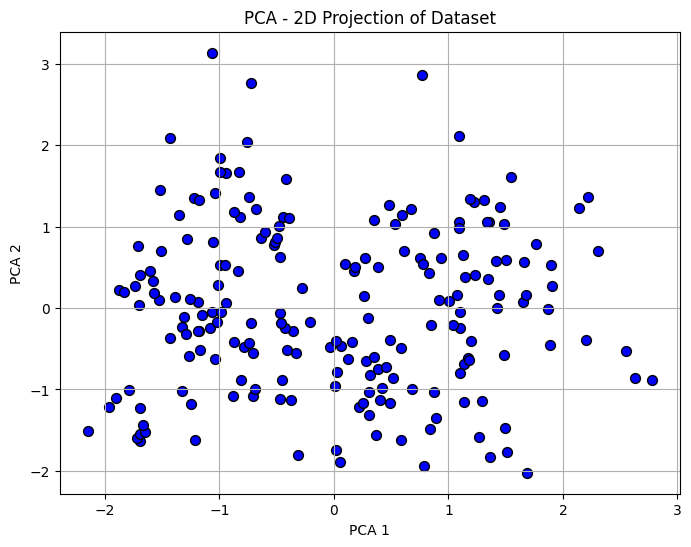

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA - 2D Projection of Dataset')
plt.grid(True)
plt.show()


In [43]:
pca.explained_variance_ratio_


array([0.33690046, 0.26230645])

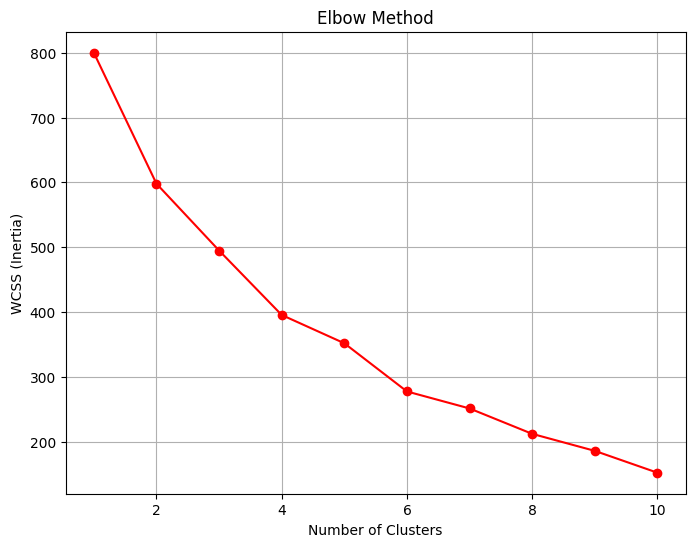

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Trying cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


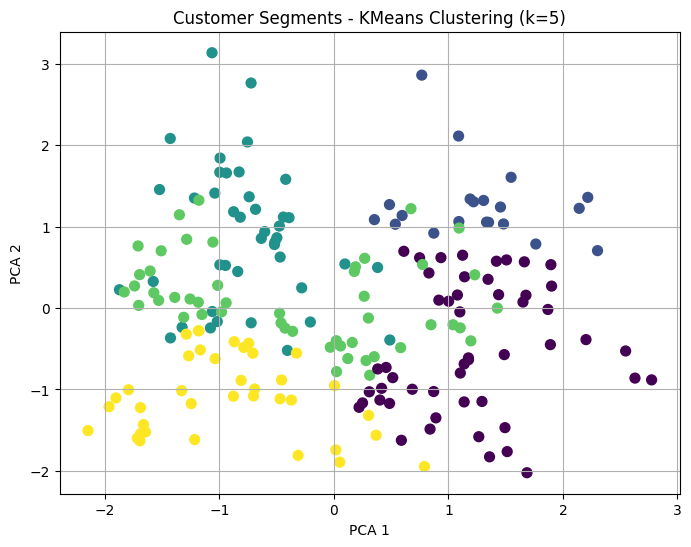

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Customer Segments - KMeans Clustering (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [47]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {sil_score:.3f}")



Silhouette Score: 0.272


In [48]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")


Davies-Bouldin Index: 1.181
